In [3]:
import numpy as np
import pandas as pd
import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df = pd.read_csv('processed_data.csv')

In [5]:
df.dropna()

,RumName,Rating,OpinionTitle,Opinion
0,La Mauny Blanc 50,7,"Great in Ti’ Punch! Rating: 7,5",This AOC Agricole Blanc is possible to drink n...
1,S.B.S. 2019 Philippines Double Aged Bourbon An...,8,Really good rum,Distilled in the Philippines in 2019 - bottled...
2,A. H. Riise Ultra Premium Black Coral,9,Very fine Riise,Color is light Smell is strong Taste is strong...
3,English Harbour 10-Year,7,Antiguan Goodness,Only tried a drop briefly when tasting a coupl...
4,The Whisky Jury 2014 Esters Hunter Catch 1 Ham...,9,Ester bomb,"8,5:On the nose, there is an ester bomb, full ..."
...,...,...,...,...
18433,Habitation Velier 2015 Monymusk MMW 7-Year,8,HV Monymusk 2015 MMW 7yo,Distilled / Bottled: 2015 / 2022 Esters: 378.8...
18434,Clairin Le Rocher,6,Clairin Le Rocher 2019 (47.2%),This Clairin is produced by Romulus Bethel in ...
18435,Clairin Sajous,9,Clairin Sajous 2019 (56.5%),This Clairin comes from the Chelo distillery o...
18436,Cowboy Country Distilling Rooster Special Reserve,9,Very tasty young rum,"Smooth. Butterscotch on the nose, maybe burnt ..."


In [6]:
df["Opinion"][1]

'Distilled in the Philippines in 2019 - bottled in DK in August 2023. 57%. There are 312 bottles in total. It tastes really good, but it also burns quite a bit at the end.'

In [7]:
df['Opinion'] = df['Opinion'].apply(lambda x: ''.join(char for char in x if char not in string.punctuation))
df['Opinion'] = df['Opinion'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in (stopwords.words('english'))]))

In [8]:
lemm = WordNetLemmatizer()
for i in range(len(df['Opinion'])):
    tokens = df['Opinion'][i].split()
    tagged = nltk.pos_tag(tokens)
    converted = ""
    for word, tag in tagged:
        lem = lemm.lemmatize(word, pos=wordnet.NOUN)
        converted += (lem + " ")
    df.loc[i, 'Opinion'] = converted
df.dropna()

,RumName,Rating,OpinionTitle,Opinion
0,La Mauny Blanc 50,7,"Great in Ti’ Punch! Rating: 7,5",this aoc agricole blanc possible drink neat ag...
1,S.B.S. 2019 Philippines Double Aged Bourbon An...,8,Really good rum,distilled philippine 2019 bottled dk august 20...
2,A. H. Riise Ultra Premium Black Coral,9,Very fine Riise,color light smell strong taste strong lovely a...
3,English Harbour 10-Year,7,Antiguan Goodness,only tried drop briefly tasting couple need ge...
4,The Whisky Jury 2014 Esters Hunter Catch 1 Ham...,9,Ester bomb,85on nose ester bomb full fermented overripe t...
...,...,...,...,...
18433,Habitation Velier 2015 Monymusk MMW 7-Year,8,HV Monymusk 2015 MMW 7yo,distilled bottled 2015 2022 ester 3788 gbl con...
18434,Clairin Le Rocher,6,Clairin Le Rocher 2019 (47.2%),this clairin produced romulus bethel small vil...
18435,Clairin Sajous,9,Clairin Sajous 2019 (56.5%),this clairin come chelo distillery owned micha...
18436,Cowboy Country Distilling Rooster Special Reserve,9,Very tasty young rum,smooth butterscotch nose maybe burnt sugar fig...


In [9]:
tfidf = TfidfVectorizer()#max_features = 2000)
X = (tfidf.fit_transform(df["Opinion"])).toarray()
y = df["Rating"]

In [10]:
from sklearn.model_selection import train_test_split

print(X.shape, y.shape)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, stratify=y)

(18438, 13540) (18438,)


In [11]:
import seaborn as sns
from sklearn import metrics

LABELS= ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS[0:num_classes],
                yticklabels=LABELS[0:num_classes],
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    # hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

CPU times: total: 1.72 s
Wall time: 1.72 s
Gaussian Naive Bayes:
              precision    recall  f1-score   support

           1       0.46      0.92      0.62        50
           2       0.26      0.76      0.39        62
           3       0.32      0.75      0.45       102
           4       0.31      0.73      0.44       165
           5       0.47      0.61      0.53       325
           6       0.58      0.54      0.55       564
           7       0.74      0.48      0.58       908
           8       0.81      0.46      0.59       886
           9       0.64      0.55      0.59       486
          10       0.34      0.81      0.48       140

    accuracy                           0.55      3688
   macro avg       0.49      0.66      0.52      3688
weighted avg       0.64      0.55      0.56      3688



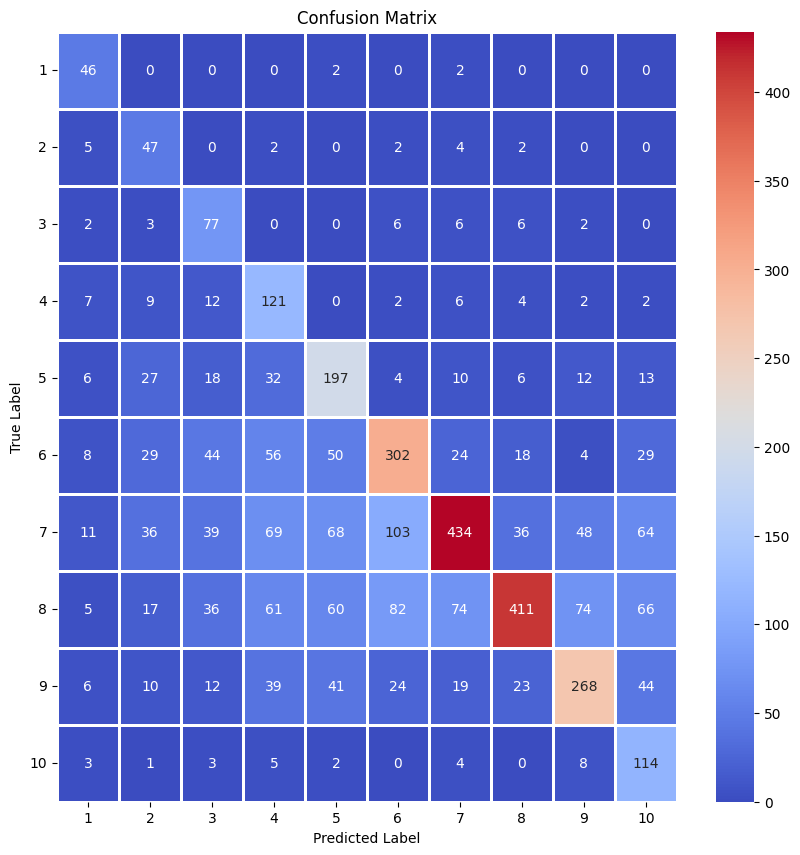

In [12]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
%time gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

print("Gaussian Naive Bayes:")
print(classification_report(y_test, y_pred_test))
show_confusion_matrix(y_test, y_pred_test, 10)

CPU times: total: 9min 5s
Wall time: 45.9 s
Logistic Regression:
              precision    recall  f1-score   support

           1       1.00      0.26      0.41        50
           2       1.00      0.08      0.15        62
           3       0.68      0.15      0.24       102
           4       0.46      0.14      0.21       165
           5       0.53      0.31      0.39       325
           6       0.46      0.47      0.47       564
           7       0.48      0.66      0.55       908
           8       0.51      0.69      0.59       886
           9       0.63      0.45      0.53       486
          10       0.93      0.10      0.18       140

    accuracy                           0.51      3688
   macro avg       0.67      0.33      0.37      3688
weighted avg       0.55      0.51      0.48      3688



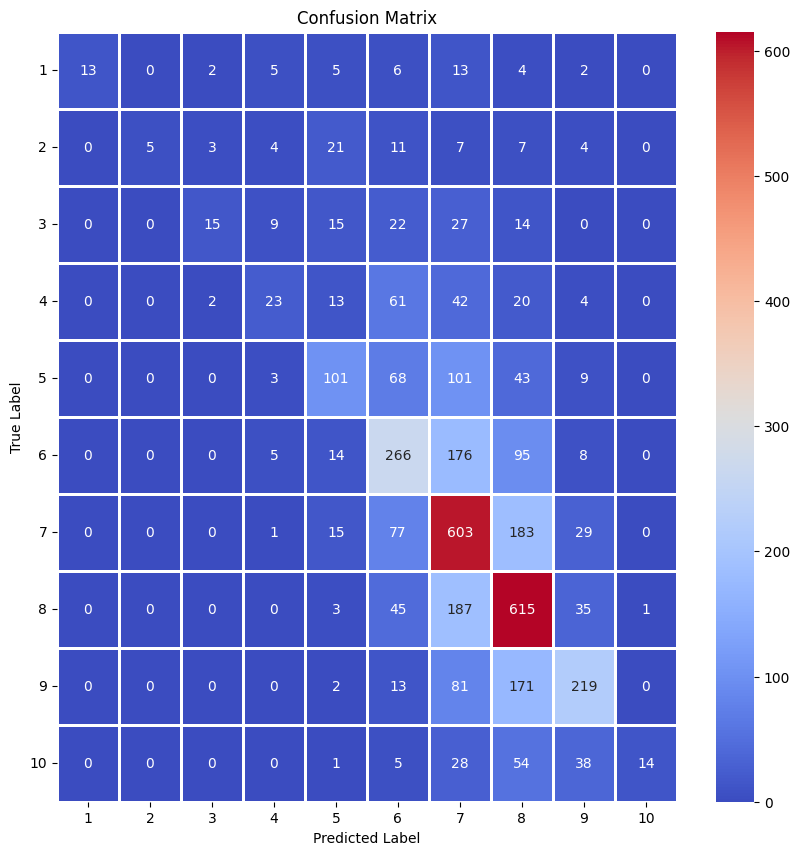

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
%time lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_test))
show_confusion_matrix(y_test, y_pred_test, 10)

CPU times: total: 1min 17s
Wall time: 1min 18s
Random Forest:
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        50
           2       1.00      0.71      0.83        62
           3       1.00      0.70      0.82       102
           4       0.97      0.84      0.90       165
           5       0.96      0.81      0.88       325
           6       0.86      0.84      0.85       564
           7       0.77      0.89      0.83       908
           8       0.79      0.90      0.84       886
           9       0.96      0.78      0.86       486
          10       1.00      0.81      0.90       140

    accuracy                           0.85      3688
   macro avg       0.93      0.82      0.87      3688
weighted avg       0.86      0.85      0.85      3688



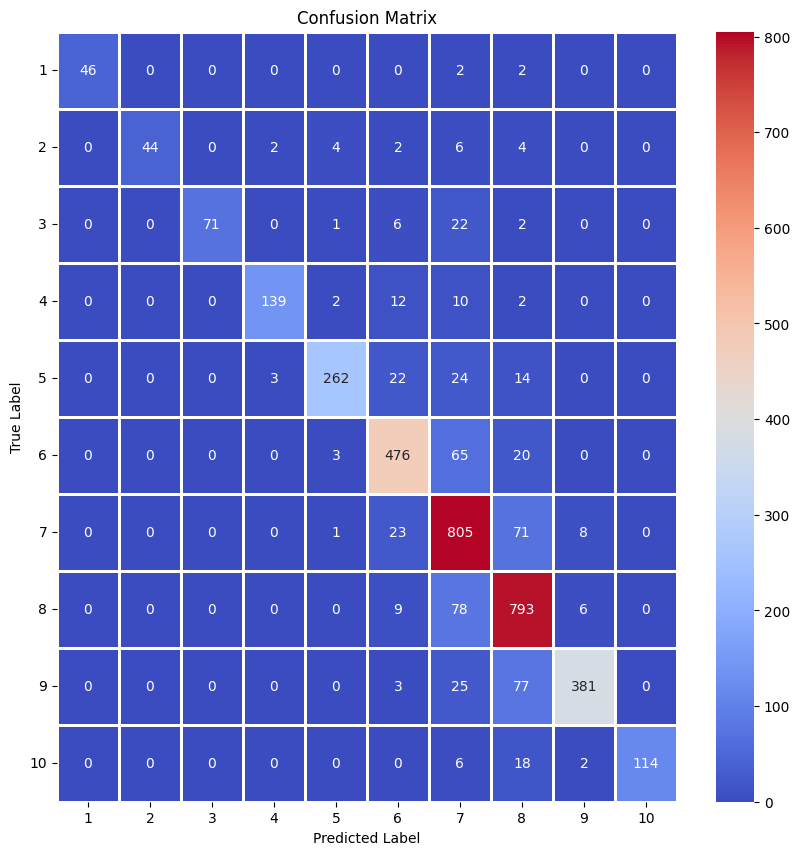

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
%time rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, y_pred_test))
show_confusion_matrix(y_test, y_pred_test, 10)

CPU times: total: 1.48 s
Wall time: 371 ms
Multinomial Naive Bayes:
              precision    recall  f1-score   support

           1       1.00      0.12      0.21        50
           2       0.00      0.00      0.00        62
           3       0.00      0.00      0.00       102
           4       0.00      0.00      0.00       165
           5       0.33      0.00      0.01       325
           6       0.49      0.10      0.16       564
           7       0.35      0.79      0.49       908
           8       0.42      0.72      0.53       886
           9       0.76      0.04      0.07       486
          10       0.00      0.00      0.00       140

    accuracy                           0.39      3688
   macro avg       0.34      0.18      0.15      3688
weighted avg       0.41      0.39      0.29      3688



C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

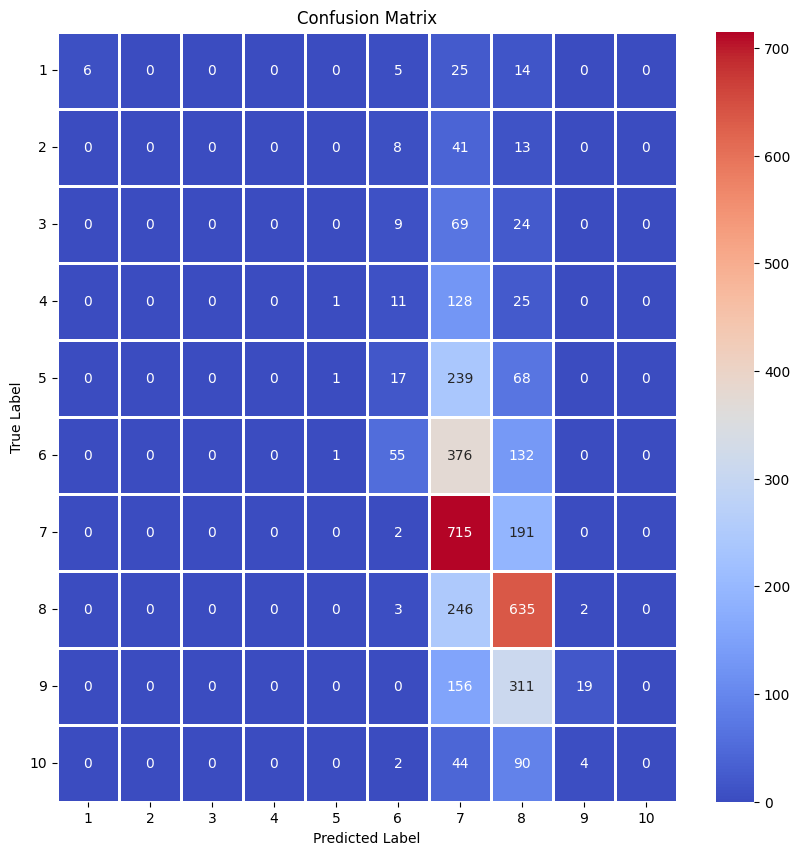

In [14]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
%time mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)

print("Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred_test))
show_confusion_matrix(y_test, y_pred_test, 10)

CPU times: total: 219 ms
Wall time: 215 ms
k-Nearest Neighbors:
              precision    recall  f1-score   support

           1       0.42      0.36      0.39        50
           2       0.14      0.11      0.12        62
           3       0.14      0.13      0.13       102
           4       0.13      0.13      0.13       165
           5       0.23      0.30      0.26       325
           6       0.28      0.33      0.31       564
           7       0.40      0.47      0.43       908
           8       0.49      0.46      0.47       886
           9       0.47      0.27      0.34       486
          10       0.45      0.18      0.26       140

    accuracy                           0.36      3688
   macro avg       0.31      0.27      0.28      3688
weighted avg       0.38      0.36      0.36      3688



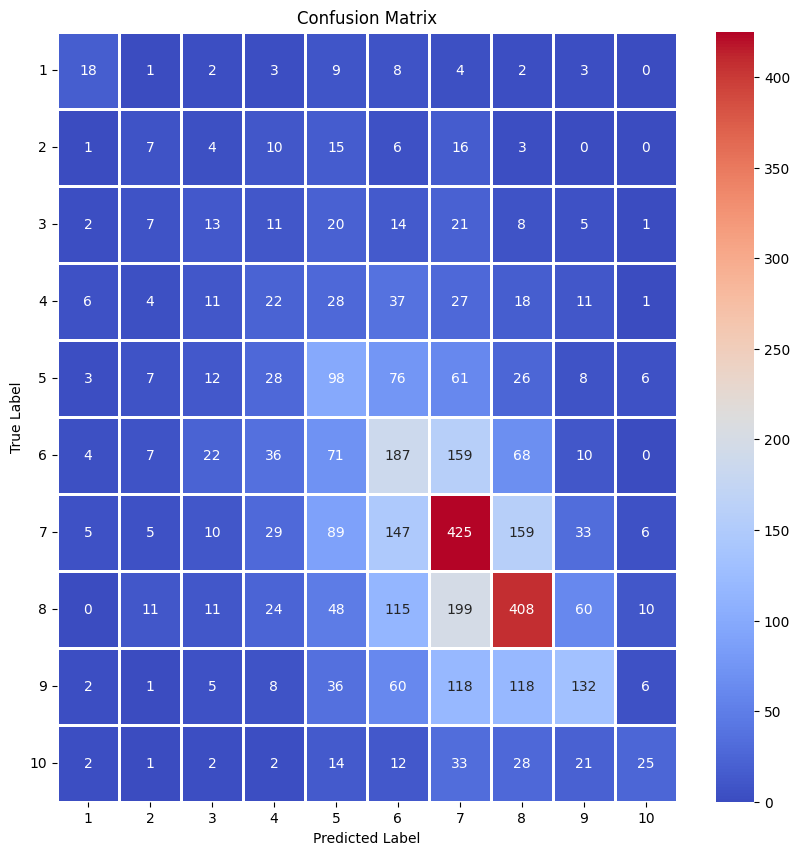

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
%time knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print("k-Nearest Neighbors:")
print(classification_report(y_test, y_pred_test))
show_confusion_matrix(y_test, y_pred_test, 10)

C:\Users\Tristan\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:26:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


CPU times: total: 23min 43s
Wall time: 1min 42s
XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        50
           1       1.00      0.55      0.71        62
           2       0.87      0.38      0.53       102
           3       0.87      0.40      0.55       165
           4       0.74      0.45      0.56       325
           5       0.68      0.50      0.58       564
           6       0.53      0.72      0.61       908
           7       0.56      0.77      0.65       886
           8       0.72      0.49      0.58       486
           9       0.91      0.54      0.68       140

    accuracy                           0.61      3688
   macro avg       0.78      0.56      0.63      3688
weighted avg       0.66      0.61      0.61      3688



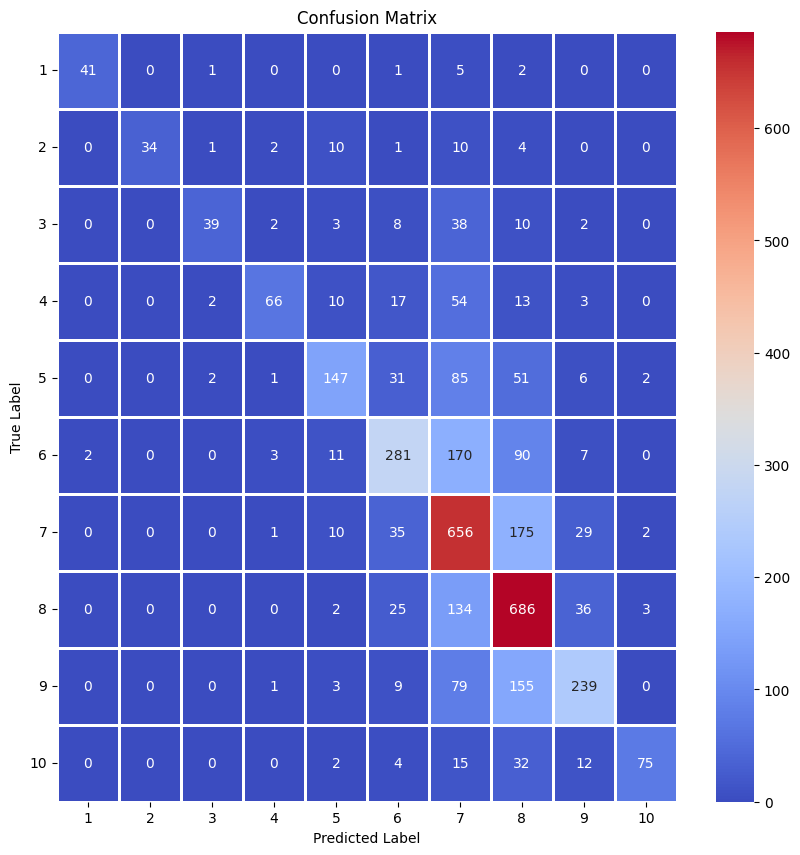

In [17]:
from xgboost import XGBClassifier

yxg_train = y_train - 1
yxg_test = y_test - 1

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
%time xgb.fit(X_train, y_train-1)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

print("XGBoost:")
print(classification_report(y_test-1, y_pred_test))
show_confusion_matrix(y_test, y_pred_test-1, 10)

In [18]:
# too much time is needed to train the classifier

# from sklearn.svm import SVC

# svc = SVC(kernel='linear', probability=True)
# %time svc.fit(X_train, y_train)

# y_pred_train = svc.predict(X_train)
# y_pred_test = svc.predict(X_test)

# print("Support Vector Machine:")
# print(classification_report(y_test, y_pred_test))
# show_confusion_matrix(y_test, y_pred_test, 10)